In [157]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [159]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [161]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [163]:
df=pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [165]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [167]:
df=df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [169]:
df['target']=iris.target
df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [183]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
#df=df.drop('target',axis='columns')
df.head()

,petal length (cm),petal width (cm),target,flower_name
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa


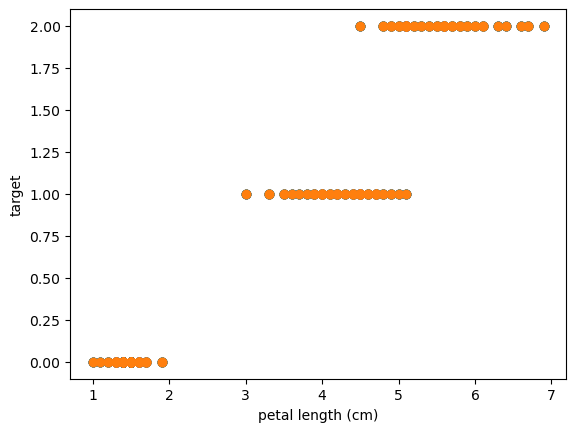

In [193]:
plt.scatter(df['petal length (cm)'],df['target'])
plt.xlabel('petal length (cm)')
plt.ylabel('target')
plt.show()

In [195]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['petal length (cm)','target']])
y_predicted

C:\Users\Athira C S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [197]:
df['cluster']=y_predicted
df.head()

,petal length (cm),petal width (cm),target,flower_name,cluster
0,1.4,0.2,0,setosa,1
1,1.4,0.2,0,setosa,1
2,1.3,0.2,0,setosa,1
3,1.5,0.2,0,setosa,1
4,1.4,0.2,0,setosa,1


In [199]:
km.cluster_centers_

array([[5.57346939, 2.        ],
       [1.462     , 0.        ],
       [4.26470588, 1.01960784]])

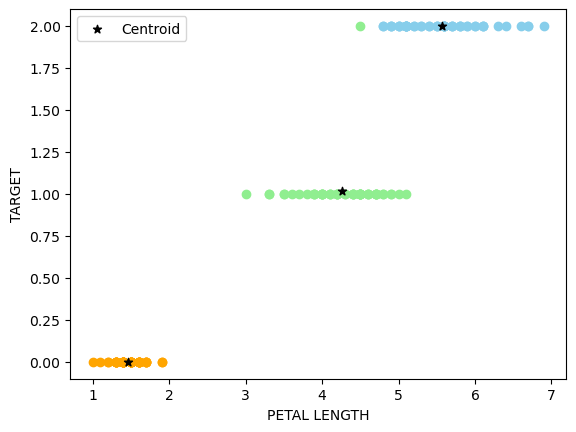

In [201]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['target'],color='skyblue')
plt.scatter(df2['petal length (cm)'],df2['target'],color='orange')
plt.scatter(df3['petal length (cm)'],df3['target'],color='lightgreen')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='Centroid')
plt.xlabel('PETAL LENGTH')
plt.ylabel('TARGET')
plt.legend()
plt.show()

In [203]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [207]:
scaler.fit(df[['target']])
df["target"]=scaler.transform(df[['target']])
scaler.fit(df[['petal length (cm)']])
df["petal length (cm)"]=scaler.transform(df[['petal length (cm)']])
df

,petal length (cm),petal width (cm),target,flower_name,cluster
0,0.067797,0.2,0.0,setosa,1
1,0.067797,0.2,0.0,setosa,1
2,0.050847,0.2,0.0,setosa,1
3,0.084746,0.2,0.0,setosa,1
4,0.067797,0.2,0.0,setosa,1
...,...,...,...,...,...
145,0.711864,2.3,1.0,virginica,0
146,0.677966,1.9,1.0,virginica,0
147,0.711864,2.0,1.0,virginica,0
148,0.745763,2.3,1.0,virginica,0


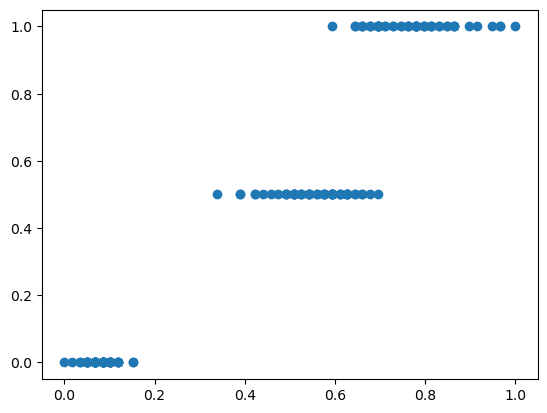

In [211]:
plt.scatter(df['petal length (cm)'],df['target'])
plt.show()

In [215]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','target']])
    sse.append(km.inertia_)

C:\Users\Athira C S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Athira C S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Athira C S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Athira C S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a m

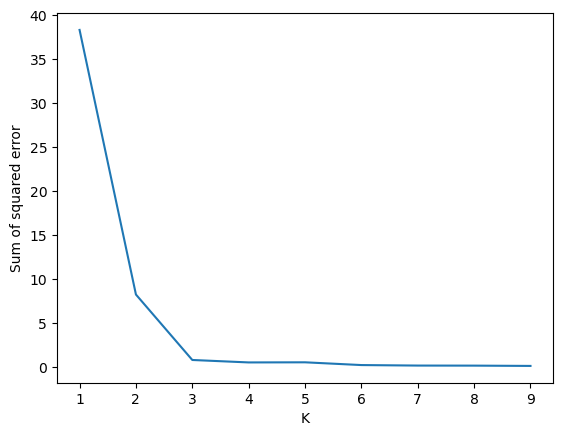

In [217]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

Optimum value of K is 3.